In [12]:
using UHDBindings
using Plots

In [4]:
# ---------------------------------------------------- 
# --- Physical layer and RF parameters 
# ---------------------------------------------------- 
carrierFreq	  = 868e6; 	# --- The carrier frequency (Hz)	
samplingRate  =  16e6;  # --- Targeted bandwidth (Hz)
rxGain		  =  30.0;  # --- Rx gain (dB)
nbSamples	  =  4096;  # --- Desired number of samples

In [5]:
# ---------------------------------------------------- 
# --- Getting all system with function calls  
# ---------------------------------------------------- 
# --- Creating the radio ressource 
radio	= openUHD(carrierFreq,samplingRate,rxGain);
# --- Display the current radio configuration
# Both Tx and Rx sides.
print(radio);

┌Rx Warning: Effective carrier frequency is 867.9999999999992 MHz and not 868.0 MHz
┌Tx Warning: Effective carrier frequency is 867.9999999999992 MHz and not 868.0 MHz
┌Rx: Current UHD Configuration in Rx mode
| Carrier Frequency: 868.000 MHz
| Sampling Frequency: 16.000 MHz
└  Rx Gain: 30.00 dB
┌Tx: Current UHD Configuration in Tx mode
| Carrier Frequency: 868.000 MHz
| Sampling Frequency: 16.000 MHz
└  Tx Gain: 30.00 dB


In [6]:
# --- Getting a buffer from the radio 
sig	= recv(radio,nbSamples);

D

In [7]:
sig

4096-element Vector{ComplexF32}:
            0.0f0 + 0.0f0im
            0.0f0 + 0.0f0im
            0.0f0 + 0.0f0im
            0.0f0 + 0.0f0im
            0.0f0 + 0.0f0im
            0.0f0 + 0.0f0im
            0.0f0 + 0.0f0im
            0.0f0 + 0.0f0im
            0.0f0 + 0.0f0im
            0.0f0 + 0.0f0im
  0.00048829603f0 + 0.0f0im
            0.0f0 + 0.0f0im
  -0.0009765921f0 - 0.0009765921f0im
                  ⋮
   0.0009765921f0 + 0.0f0im
 -0.00048829603f0 + 0.00048829603f0im
            0.0f0 + 0.0f0im
            0.0f0 - 0.00048829603f0im
 -0.00048829603f0 - 0.00051881454f0im
  0.00094607356f0 - 0.00048829603f0im
   0.0009765921f0 - 0.00244148f0im
            0.0f0 - 0.0014648881f0im
   0.0009765921f0 + 0.0f0im
   0.0009765921f0 + 0.0009765921f0im
  0.00045777753f0 + 0.00045777753f0im
 -0.00048829603f0 - 0.00048829603f0im

In [8]:
# This also can be done with pre-allocation 
buffer = zeros(Complex{Cfloat},nbSamples);
recv!(buffer,radio);

In [9]:
buffer

4096-element Vector{ComplexF32}:
   0.0014648881f0 + 0.0f0im
  0.00048829603f0 + 0.0f0im
   0.0014648881f0 - 3.0518502f-5im
   0.0009765921f0 - 0.00048829603f0im
  -0.0009765921f0 - 0.0014648881f0im
    -3.0518502f-5 - 0.00048829603f0im
  0.00048829603f0 + 0.0f0im
  -0.0014648881f0 + 0.0009765921f0im
  -0.0009765921f0 + 0.00094607356f0im
  -0.0009765921f0 + 0.0f0im
  0.00048829603f0 + 0.00048829603f0im
            0.0f0 + 0.00048829603f0im
 -0.00048829603f0 + 0.00048829603f0im
                  ⋮
   0.0009765921f0 + 0.0f0im
 -0.00048829603f0 + 0.00094607356f0im
 -0.00048829603f0 + 0.0f0im
 -0.00048829603f0 + 0.00048829603f0im
 -0.00048829603f0 - 0.00048829603f0im
            0.0f0 + 0.0f0im
  0.00048829603f0 + 0.00048829603f0im
            0.0f0 + 0.00048829603f0im
  0.00045777753f0 - 0.0009765921f0im
 -0.00048829603f0 + 0.0f0im
  -0.0014648881f0 + 0.0f0im
  -0.0009765921f0 - 0.00048829603f0im

In [10]:
# --- Release the radio ressources
close(radio); 

[ Info: USRP device is now closed.


In [11]:
# --- Output to signal 
sig;

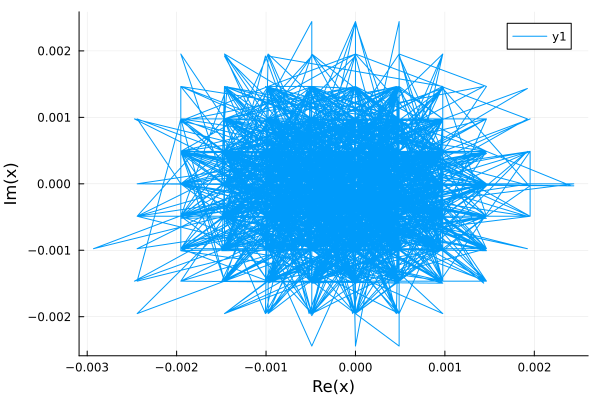

In [13]:
plot(buffer)